##**Pivot Population Data**
- **pivot()** method changes rows to colums, cols to row
- **line()** chart for time series data
- **bar()** chart compares numeric values, side by side
- **pie()** chart shows percent share

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the csv file
url = '/content/drive/MyDrive/-___-___-___-_Noble-Desktop-Python-Data-Sci-Mar-2024-Lessons-08-14/-___-___-___-_Noble-Desktop-Python-Data-Sci-Mar-2024-START/csv/countries_population_from_1955_to_2020.csv'
pop_df = pd.read_csv(url)
print(pop_df.shape) # (4195, 14)
pop_df.head()

(4195, 14)


,Year,Country,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop %,World Population,Country Global Rank
0,2020,China,1439323776,0.39,5540090,-348399.0,38.4,1.69,153,60.8,875075919.0,18.47,7794798739,1
1,2019,China,1433783686,0.43,6135900,-348399.0,37.0,1.65,153,59.7,856409297.0,18.59,7713468100,1
2,2018,China,1427647786,0.47,6625995,-348399.0,37.0,1.65,152,58.6,837022095.0,18.71,7631091040,1
3,2017,China,1421021791,0.49,6972440,-348399.0,37.0,1.65,151,57.5,816957613.0,18.83,7547858925,1
4,2016,China,1414049351,0.51,7201481,-348399.0,37.0,1.65,151,56.3,796289491.0,18.94,7464022049,1


In [ ]:
# check for null data
pop_df.info()
# L@@K: Some columns have a lot of null values, but this is okay
# because we only want to work with Year, Country and Population columns
# all of which have complete data (all 4195 rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4195 entries, 0 to 4194
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            4195 non-null   int64  
 1   Country                         4195 non-null   object 
 2   Population                      4195 non-null   int64  
 3   Yearly % Change                 4195 non-null   float64
 4   Yearly Change                   4195 non-null   int64  
 5   Migrants (net)                  3600 non-null   float64
 6   Median Age                      3600 non-null   float64
 7   Fertility Rate                  3600 non-null   float64
 8   Density (P/Km²)                 4195 non-null   object 
 9   Urban Pop %                     4082 non-null   float64
 10  Urban Population                4082 non-null   float64
 11  Country's Share of World Pop %  4195 non-null   float64
 12  World Population                41

In [ ]:
# show missing data counts:
print(pop_df.isna().sum())

Year                                0
Country                             0
Population                          0
Yearly % Change                     0
Yearly Change                       0
Migrants (net)                    595
Median Age                        595
Fertility Rate                    595
Density (P/Km²)                     0
Urban Pop %                       113
Urban Population                  113
Country's Share of World Pop %      0
World Population                    0
Country Global Rank                 0
dtype: int64


In [ ]:
# get rid of all missing data -- that's any row that has
# even ONE bad column -- this is just a demo. after this
pop_cleaned_df = pop_df.dropna()

In [ ]:
print(pop_cleaned_df.shape) # (3552, 14)
pop_cleaned_df

(3552, 14)


,Year,Country,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop %,World Population,Country Global Rank
0,2020,China,1439323776,0.39,5540090,-348399.0,38.4,1.69,153,60.8,875075919.0,18.47,7794798739,1
1,2019,China,1433783686,0.43,6135900,-348399.0,37.0,1.65,153,59.7,856409297.0,18.59,7713468100,1
2,2018,China,1427647786,0.47,6625995,-348399.0,37.0,1.65,152,58.6,837022095.0,18.71,7631091040,1
3,2017,China,1421021791,0.49,6972440,-348399.0,37.0,1.65,151,57.5,816957613.0,18.83,7547858925,1
4,2016,China,1414049351,0.51,7201481,-348399.0,37.0,1.65,151,56.3,796289491.0,18.94,7464022049,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,1975,Antigua and Barbuda,62675,-0.47,-300,-1404.0,19.0,3.26,142,39.1,24503.0,0.00,4079480606,197
3613,1970,Antigua and Barbuda,64177,1.80,1096,-240.0,17.4,4.00,146,35.4,22692.0,0.00,3700437046,196
3614,1965,Antigua and Barbuda,58698,1.63,913,-376.0,17.8,4.30,133,37.9,22252.0,0.00,3339583597,194
3615,1960,Antigua and Barbuda,54131,1.74,897,-300.0,18.5,4.50,123,40.5,21945.0,0.00,3034949748,194


**list = list.copy()**
**df = df.copy()**
for making a *deep copy*, which is an "independent" copy

In [ ]:
fruits = ['apple', 'banana', 'cherry']
# a copy of a collection (list, dict, df) results in a 'shallow copy'
# that is, a copy which is still 'connected to' the original
# changes made to the copy 'back up' and hit the original as well
fruits2 = fruits

In [ ]:
fruits2.append('grape')
print(fruits2)
print(fruits) # fruits picked up the change to fruits2

['apple', 'banana', 'cherry', 'grape']
['apple', 'banana', 'cherry', 'grape']


In [ ]:
# this 'connection' issue does not exist w primitives likes nums and strings
fru = 'apple'
# a copy made by direct assignment results in an independent var, one that is
# not 'connected' to the original
fru2 = fru
# changes made to the copy do not affect the original
fru2 = 'peach'
print(fru2)
print(fru)

peach
apple


In [ ]:
# to copy a list, dict or df, use copy() to make a deep copy
froots = ['apricot', 'blueberry', 'cherimoya']
froots2 = froots.copy()

In [ ]:
froots2.append('grapefruit')
print(froots2)
print(froots)

['apricot', 'blueberry', 'cherimoya', 'grapefruit']
['apricot', 'blueberry', 'cherimoya']


In [ ]:
# rather than get rid of all missing data --
# plug the gaps with average values
pop_copy_df = pop_df.copy()

In [ ]:
print(pop_copy_df.shape) # (4195, 14)
pop_copy_df

(4195, 14)


,Year,Country,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop %,World Population,Country Global Rank
0,2020,China,1439323776,0.39,5540090,-348399.0,38.4,1.69,153,60.8,875075919.0,18.47,7794798739,1
1,2019,China,1433783686,0.43,6135900,-348399.0,37.0,1.65,153,59.7,856409297.0,18.59,7713468100,1
2,2018,China,1427647786,0.47,6625995,-348399.0,37.0,1.65,152,58.6,837022095.0,18.71,7631091040,1
3,2017,China,1421021791,0.49,6972440,-348399.0,37.0,1.65,151,57.5,816957613.0,18.83,7547858925,1
4,2016,China,1414049351,0.51,7201481,-348399.0,37.0,1.65,151,56.3,796289491.0,18.94,7464022049,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4190,1975,Holy See,728,2.48,17,NaN,NaN,NaN,"1,820",NaN,NaN,0.00,4079480606,235
4191,1970,Holy See,644,-5.49,-42,NaN,NaN,NaN,"1,610",NaN,NaN,0.00,3700437046,235
4192,1965,Holy See,854,-1.18,-10,NaN,NaN,NaN,"2,135",NaN,NaN,0.00,3339583597,235
4193,1960,Holy See,906,-0.04,0,NaN,NaN,NaN,"2,265",NaN,NaN,0.00,3034949748,235


In [ ]:
# fill the median age column with the mean age
# get the mean of the Median Age col:
mean_med_age = pop_copy_df['Median Age'].mean()
# mean_med_age = round(mean_med_age,2)
print('mean_med_age:', mean_med_age)

mean_med_age: 25.490277777777777


In [ ]:
# fill the any missing Median Age w the mean:
pop_copy_df['Median Age'].fillna(value=mean_med_age, inplace=True)

In [ ]:
# see if it worked
pop_copy_df.isna().sum()

Year                                0
Country                             0
Population                          0
Yearly % Change                     0
Yearly Change                       0
Migrants (net)                    595
Median Age                          0
Fertility Rate                    595
Density (P/Km²)                     0
Urban Pop %                       113
Urban Population                  113
Country's Share of World Pop %      0
World Population                    0
Country Global Rank                 0
dtype: int64

In [ ]:
# make a df of only 3 cols: 'Year', 'Country', 'Population'
pop_3col_df = pop_df[['Year', 'Country', 'Population']]
print(pop_3col_df.shape) # (4195, 3)
pop_3col_df.head()

(4195, 3)


,Year,Country,Population
0,2020,China,1439323776
1,2019,China,1433783686
2,2018,China,1427647786
3,2017,China,1421021791
4,2016,China,1414049351


In [ ]:
# rename "Population" to "Pop"
pop_3col_df = pop_3col_df.rename(columns={"Population":"Pop"})
pop_3col_df.head()

,Year,Country,Pop
0,2020,China,1439323776
1,2019,China,1433783686
2,2018,China,1427647786
3,2017,China,1421021791
4,2016,China,1414049351


In [ ]:
# get just the 2020 rows, sorted by population in descending order
_2020_df = pop_3col_df[ pop_3col_df['Year'] == 2020 ].sort_values(by="Pop", ascending=False)

print(_2020_df.shape) # (200, 3)
_2020_df.head()

(200, 3)


,Year,Country,Pop
0,2020,China,1439323776
18,2020,India,1380004385
36,2020,United States,331002651
54,2020,Indonesia,273523615
72,2020,Pakistan,220892340


**df['col'].unique()** returns a list of all unique values in col

In [ ]:
# from the whole df of 4195 rows, print out the unique countries
countries_list = pop_3col_df['Country'].unique()
print(len(countries_list), countries_list) # 235

In [ ]:
years_list = pop_3col_df['Year'].unique()
print(len(years_list), years_list) # 18

18 [2020 2019 2018 2017 2016 2015 2010 2005 2000 1995 1990 1985 1980 1975
 1970 1965 1960 1955]


In [ ]:
# get the top 10 most populous countries by slicing the first 20 rows of _2020_pop_df
# we don't need the Year column any longer, as the population just means latest / now
_top_10_df = _2020_df[['Country', 'Pop']][:10]

print(_top_10_df.shape) # (10, 2)
_top_10_df

(10, 2)


,Country,Pop
0,China,1439323776
18,India,1380004385
36,United States,331002651
54,Indonesia,273523615
72,Pakistan,220892340
90,Brazil,212559417
108,Nigeria,206139589
126,Bangladesh,164689383
144,Russia,145934462
162,Mexico,128932753


In [ ]:
# make a horizontal bar chart showing shares of Top 10 countries
# ax = top_10_mpg_makes_df.plot(kind='barh', color='cornflowerblue')

# the row indexes will be used by the chart for the y-axis values
# currently these are just number (Mexico is 162, etc)
# so assign Country column values to row indices
# do not rerun this cell, because next time there will no longer be a 'Country' column to target
_top_10_df = _top_10_df.set_index('Country')

In [ ]:
_top_10_df

,Pop
Country,
China,1439323776
India,1380004385
United States,331002651
Indonesia,273523615
Pakistan,220892340
Brazil,212559417
Nigeria,206139589
Bangladesh,164689383
Russia,145934462


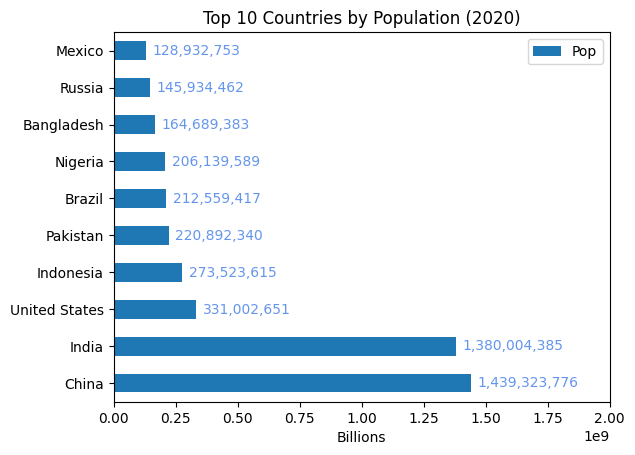

In [ ]:
# make a horizontal bar chart from _top_10_pop_df
# save the plot() expression to ax variable
# ax is needed later to add numeric labels to the bars
ax = _top_10_df.plot(kind='barh')

# label the chart
plt.title("Top 10 Countries by Population (2020)")
plt.xlabel("Billions")
# 'Country' is displaying by default as y-axis label, but this
# is obvious, so override the label with an empty string
plt.ylabel("")

# label the individual bars
for bar in ax.containers:
  # fmt (format) converts scientific notation to "regular numbers"
  # padding sets gap between bar and numeric value label
  ax.bar_label(bar, fmt='{:,.0f}'.format, padding=5, color='cornflowerblue')

# expand the x-axis out to 2.0 (2 billion)
# so that the numeric labels don't spill out of the chart
plt.xlim(0,2000000000)

plt.show()

**pivoting the data**
- **pivot()** changes columns to rows and vice-versa
- **pivot(index, columns, values)** takes 3 arguments:
  - **index:** the column that will become the row (index) names
  - **columns:** the column which contains the values that will be used for column names
  - **values:** the numeric value that will go in the individual "table cells"

**pivot()** returns reshaped DataFrame organized by given index / column values

In [ ]:
# make a new df called pop_piv_df set equal to the orig df with the
# pivot() method called on it
pop_piv_df = pop_3col_df.pivot(index="Year", columns="Country", values="Pop")
print(pop_piv_df.shape) # (18, 235)
pop_piv_df
# L@@K: the pivoted df has 235 columns -- one for each country
# there are 18 rows, one for each year sampled (1955, 1960, 1965, etc.)

In [ ]:
# get some Western European countries

In [ ]:
# 'Austria', 'Belgium', 'Denmark', 'United Kingdom', 'France', 'Germany', 'Italy', 'Netherlands', 'Portugal', 'Spain', 'Sweden'
west_euro_df = pop_piv_df[['France', 'Germany', 'Italy', 'Portugal', 'Spain', 'Sweden', 'United Kingdom']]
print(west_euro_df.shape) # (18, 7)
west_euro_df

(18, 7)


Country,France,Germany,Italy,Portugal,Spain,Sweden,United Kingdom
Year,,,,,,,
1955,43411367.0,71537459.0,48335578.0,8625532.0,29048395.0,7262623.0,51063902.0
1960,45673146.0,73414239.0,49699951.0,8844645.0,30402411.0,7482543.0,52370602.0
1965,48746652.0,76258032.0,51677257.0,8862280.0,32146263.0,7745673.0,54240850.0
1970,50763920.0,78578385.0,53518969.0,8651340.0,33883749.0,8054916.0,55573453.0
1975,52688576.0,78856039.0,55265284.0,9172241.0,35879209.0,8197340.0,56152333.0
1980,53868009.0,78283100.0,56349349.0,9750964.0,37698196.0,8316338.0,56209171.0
1985,55254848.0,77691595.0,56936774.0,9929184.0,38733876.0,8357652.0,56413553.0
1990,56666849.0,79053984.0,57048236.0,9895364.0,39202525.0,8567384.0,57134391.0
1995,57801892.0,81138659.0,57174408.0,10091325.0,39787419.0,8836420.0,57932453.0


**line plot**

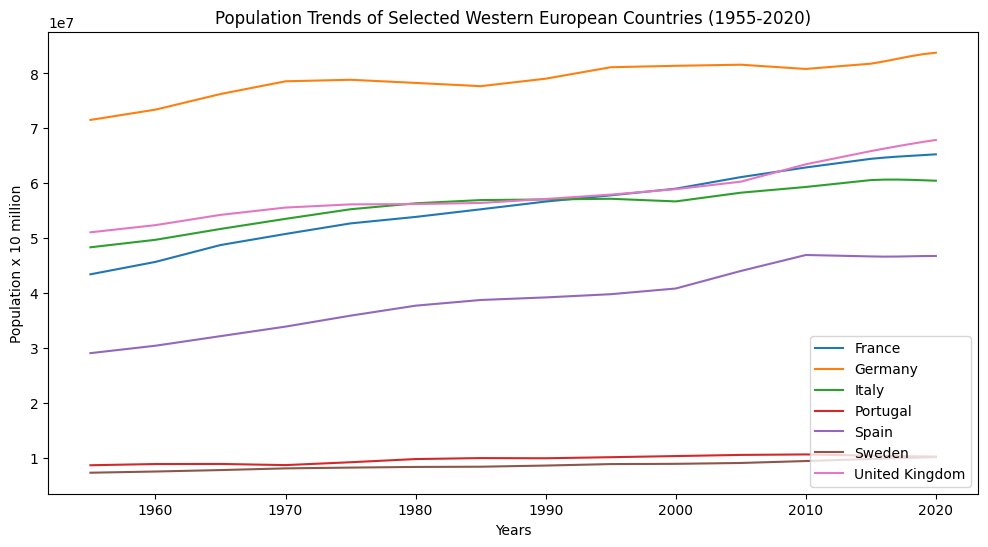

In [ ]:
west_euro_df.plot(kind="line",
              xlabel="Years",
              ylabel="Population x 10 million",
              title="Population Trends of Selected Western European Countries (1955-2020)",
              figsize=(12,6)
)
plt.legend(loc='lower right')
plt.show()

**bar plot**

In [ ]:
# make a df of just China and India:
china_india_df = pop_piv_df[['China', 'India']]
print(china_india_df.shape) # (18, 2)
china_india_df

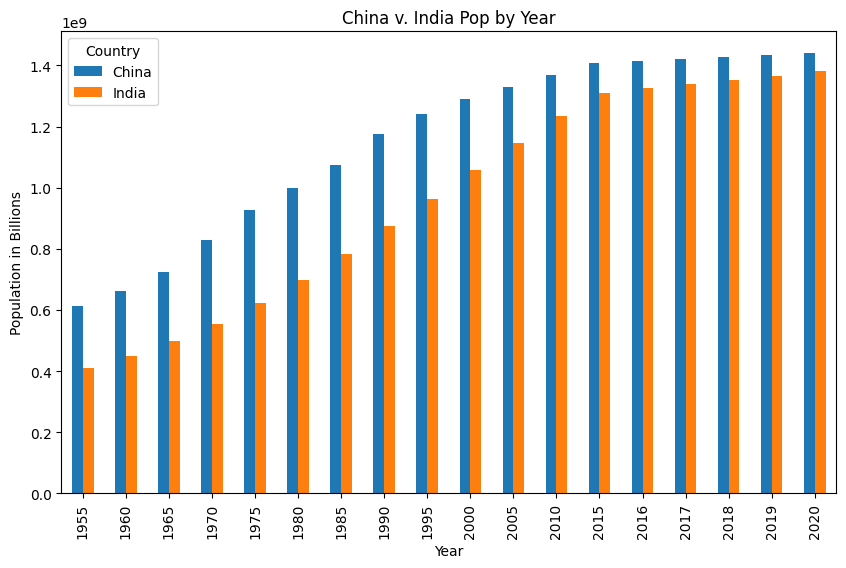

In [ ]:
# plot China v. India Pop by year:
china_india_df.plot.bar(figsize=(10,6))
plt.title('China v. India Pop by Year')
plt.ylabel('Population in Billions')
plt.show()

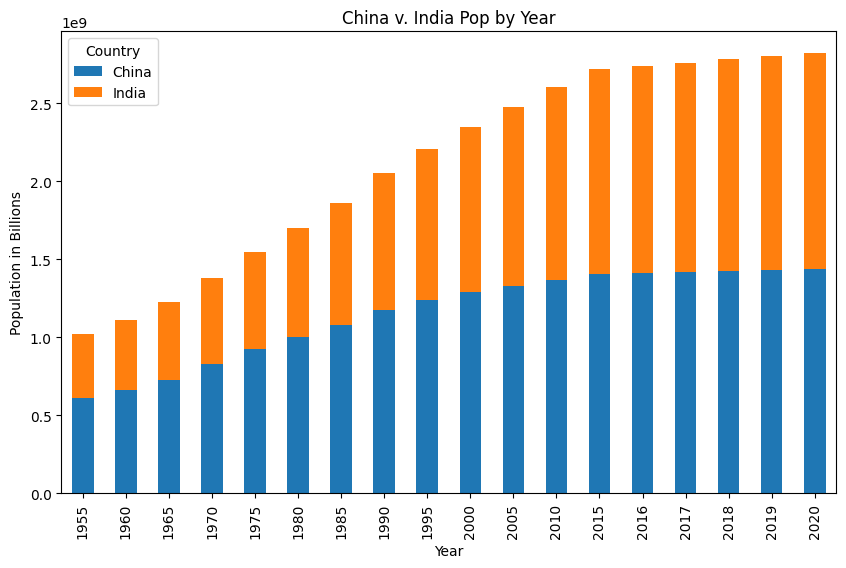

In [ ]:
# stacked bar chart version of the above
# plot China v. India Pop by year:
ax = china_india_df.plot.bar(figsize=(10,6), stacked=True)
plt.title('China v. India Pop by Year')
plt.ylabel('Population in Billions')

# for bar in ax.containers:
#   # fmt (format) converts scientific notation to "regular numbers"
#   # padding sets gap between bar and numeric value label
#   ax.bar_label(bar, fmt='{:,f}'.format, padding=5, color='cornflowerblue', rotation=90)

plt.show()

**making a piecharts**
- pie charts are best for showing several items' share of 100% of some total
- **plt.pie()** takes numeric values and string labels as its required arguments

- We will make a pie chart showing the population shares of the 5 permanent member  
countries of United Nations Security Council: China, France, Russian Federation,  
United Kingdom, and United States
- the population will be for year 2020


In [ ]:
# make a dataframe of the 5 permanent member countries of the U.N. Security Council:
# China, France, Russia, United Kingdom, United States
un_sec_council_df = pop_piv_df[['China', 'France', 'Russia', 'United Kingdom', 'United States']]

print(un_sec_council_df.shape) # (18, 5)
un_sec_council_df

(18, 5)


Country,China,France,Russia,United Kingdom,United States
Year,,,,,
1955,6.122416e+08,43411367.0,111355300.0,51063902.0,171685336.0
1960,6.604081e+08,45673146.0,119871700.0,52370602.0,186720571.0
1965,7.242190e+08,48746652.0,126503736.0,54240850.0,199733676.0
1970,8.276014e+08,50763920.0,130148653.0,55573453.0,209513341.0
1975,9.262409e+08,52688576.0,133804858.0,56152333.0,219081251.0
1980,1.000089e+09,53868009.0,138053150.0,56209171.0,229476354.0
1985,1.075589e+09,55254848.0,142957284.0,56413553.0,240499825.0
1990,1.176884e+09,56666849.0,147531561.0,57134391.0,252120309.0
1995,1.240921e+09,57801892.0,148227466.0,57932453.0,265163745.0


['China', 'France', 'Russia', 'United Kingdom', 'United States']
[1439323776.0, 65273511.0, 145934462.0, 67886011.0, 331002651.0]


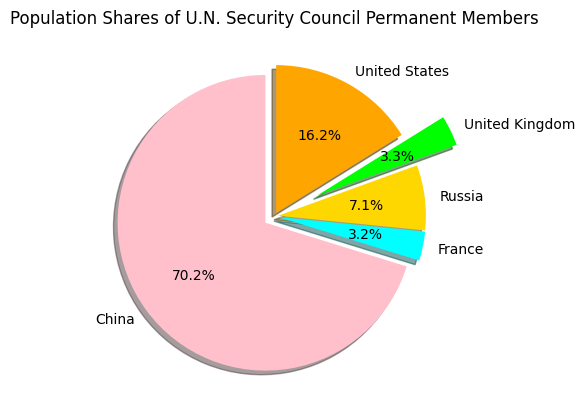

In [ ]:
# make a list from the columns, these being the 5 security council country names
countries = un_sec_council_df.columns.tolist()
print(countries) # ['China', 'France', 'Russia', 'United Kingdom', 'United States']

populations = un_sec_council_df.loc[2020].tolist()
print(populations) # [1439323776.0, 65273511.0, 145934462.0, 67886011.0, 331002651.0]

# set explosion values, that is, the distance by which the individual
# pie slices are offset away from the center of the pie
# 0.025, 0.025, 0.025, 0.025, 0.025

# make the pie
plt.pie(populations,
        labels=countries,
        explode = (0.075, 0.025, 0.025, 0.325, 0.025),
        autopct='%1.1f%%',
        colors=['pink', 'aqua', 'gold', 'lime', 'orange'],
        # set a shadow and start angle of 90
        shadow=True,
        startangle=90
)
plt.title('Population Shares of U.N. Security Council Permanent Members')
plt.show()